In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,t

In [2]:
Walmart=pd.read_csv("walmart_data.csv")
Walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
Walmart.shape

(550068, 10)

In [4]:
Walmart.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [5]:
Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


<AxesSubplot:xlabel='Purchase', ylabel='Gender'>

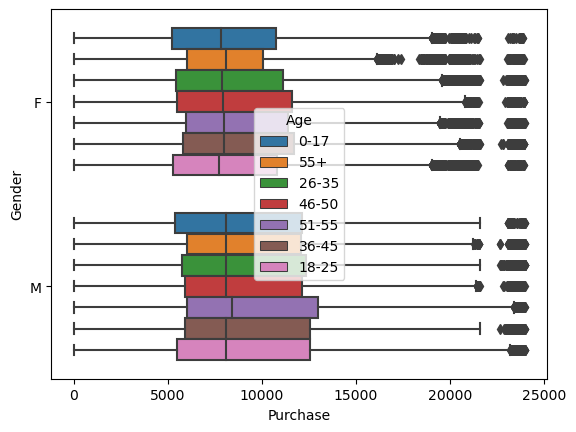

In [6]:
sns.boxplot(x=Walmart["Purchase"],y=Walmart["Gender"],hue=Walmart["Age"]
            )

<AxesSubplot:xlabel='Purchase', ylabel='Gender'>

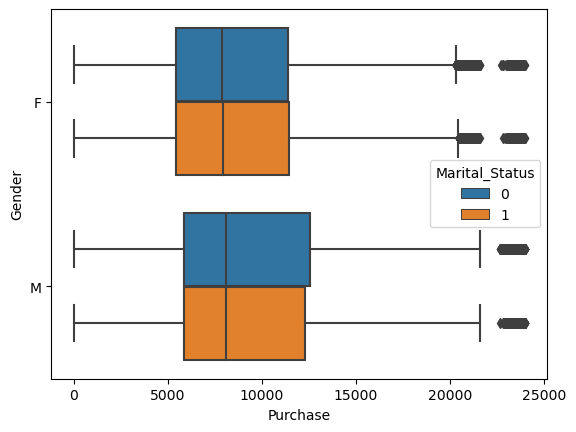

In [7]:
sns.boxplot(x=Walmart["Purchase"],y=Walmart["Gender"],hue=Walmart["Marital_Status"]
            )

<AxesSubplot:xlabel='Marital_Status', ylabel='Gender'>

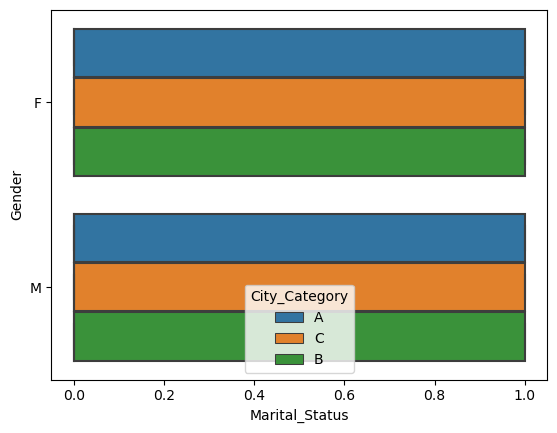

In [8]:
sns.boxplot(x=Walmart["Marital_Status"],y=Walmart["Gender"],
            hue=Walmart["City_Category"])

<AxesSubplot:xlabel='Age', ylabel='Occupation'>

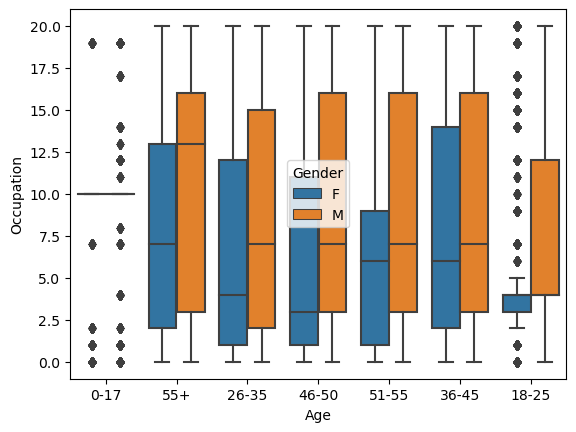

In [9]:
sns.boxplot(y=Walmart["Occupation"],x=Walmart["Age"],hue=Walmart["Gender"]
            )

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

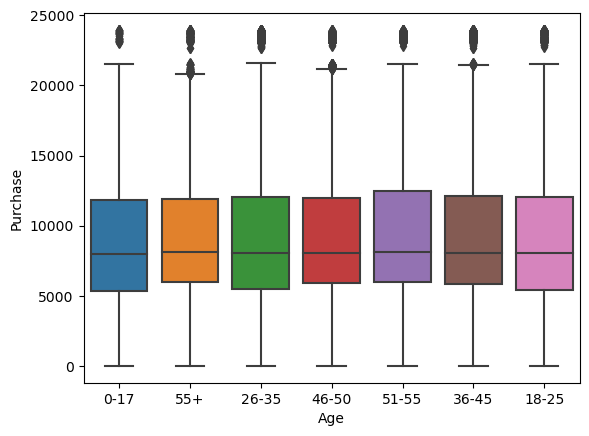

In [10]:
#sns.boxplot(x=Walmart["Gender"],y=Walmart["Marital_Status"],hue=Walmart["Product_ID"])
sns.boxplot(y=Walmart["Purchase"],x=Walmart["Age"])

In [11]:
Walmart_male=Walmart[Walmart["Gender"]=="M"]
Walmart_male

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [12]:
Walmart["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [13]:
Walmart_male["Product_ID"].value_counts()

P00265242    1372
P00025442    1267
P00110742    1247
P00112142    1223
P00057642    1212
             ... 
P00340742       1
P00306942       1
P00144142       1
P00065542       1
P00203742       1
Name: Product_ID, Length: 3588, dtype: int64

In [14]:
Walmart_male["Purchase"].mean()

9437.526040472265

In [16]:
Walmart_female=Walmart[Walmart["Gender"]=="F"]
Walmart_female

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [17]:
Walmart_female["Product_ID"].value_counts()

P00265242    508
P00220442    440
P00058042    387
P00255842    375
P00110742    365
            ... 
P00245742      1
P00229142      1
P00310942      1
P00225242      1
P00271642      1
Name: Product_ID, Length: 3367, dtype: int64

In [18]:
#Use the sample average to find out an interval within which the population average will lie. Using the sample of female 
#customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.


In [19]:
samp = np.array(Walmart["Purchase"].sample(len(Walmart)))
samp

array([ 8643, 10003, 11434, ...,  3809,  7079, 15807], dtype=int64)

In [20]:
x_bar =samp.mean()
x_bar

9263.968712959126

In [21]:
n = len(samp)
s = pd.Series(samp).std()

In [22]:
med_s = np.median(samp)

In [23]:
print("Sample mean = ", x_bar)
print("Sample std dev = ", s)
print("Sample size (n) = ", n)

print("\nSample median = ", med_s)

Sample mean =  9263.968712959126
Sample std dev =  5023.0653938205205
Sample size (n) =  550068

Sample median =  8047.0


In [24]:
mean_purchase=Walmart["Purchase"].mean()
mean_purchase

9263.968712959126

In [25]:
SE=s/np.sqrt(n)
SE

6.772681333409325

In [26]:
#so the mean_purchase comes under 

In [27]:
(x_bar - SE),(x_bar + SE)

(9257.196031625715, 9270.741394292536)

So The avg of pop sample will lie under (9257.196031625715, 9270.741394292536)

In [29]:
Walmart_female["Purchase"].mean()

8734.565765155476

In [30]:
# The Walmart_female["Purchase"].mean() is a outlier so it does not lie under the confidence interval

In [31]:
samp = np.array(Walmart["Purchase"].sample(len(Walmart)))
samp

array([20317, 15969,  4427, ..., 16176,  8606, 16504], dtype=int64)

In [32]:
x_bar =samp.mean()
x_bar

9263.968712959126

In [33]:
n = len(samp)
s = pd.Series(samp).std()

In [34]:
print("Sample mean = ", x_bar)
print("Sample std dev = ", s)
print("Sample size (n) = ", n)


Sample mean =  9263.968712959126
Sample std dev =  5023.065393820561
Sample size (n) =  550068


In [35]:
SE=s/np.sqrt(n)
SE

6.772681333409381

In [36]:
print("68% confidence interval is  " ,[(x_bar - SE),(x_bar + SE)])

print("95% confidence interval is  " ,[(x_bar -(2* SE)),(x_bar + (2* SE))])

print("99% confidence interval is  " ,[(x_bar - (3* SE)),(x_bar + (3* SE))])

68% confidence interval is   [9257.196031625715, 9270.741394292536]
95% confidence interval is   [9250.423350292307, 9277.514075625944]
99% confidence interval is   [9243.650668958897, 9284.286756959355]


Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. 

In [38]:
samp1 = np.array(Walmart_female["Purchase"].sample(len(Walmart_female)))
samp1

array([ 8701,  5254, 12467, ...,  8669, 11793,  9124], dtype=int64)

In [39]:
x_bar1 =samp1.mean()
x_bar1

8734.565765155476

In [40]:
n = len(samp1)
s = pd.Series(samp1).std()
SE=s/np.sqrt(n)
print("n=",n,
      "s=",s,
      "SE=",SE)

n= 135809 s= 4767.233289291485 SE= 12.936063220950798


In [41]:
print("Sample mean = ", x_bar1)
print("Sample std dev = ", s)
print("Sample size (n) = ", n)

Sample mean =  8734.565765155476
Sample std dev =  4767.233289291485
Sample size (n) =  135809


In [42]:
print("68% confidence interval is  " ,[(x_bar1 - SE),(x_bar1 + SE)])

print("95% confidence interval is  " ,[(x_bar1 -(2* SE)),(x_bar1 + (2* SE))])

print("99% confidence interval is  " ,[(x_bar1 - (3* SE)),(x_bar1 + (3* SE))])

68% confidence interval is   [8721.629701934526, 8747.501828376426]
95% confidence interval is   [8708.693638713574, 8760.437891597378]
99% confidence interval is   [8695.757575492624, 8773.373954818328]


In [43]:
samp2 = np.array(Walmart_male["Purchase"].sample(len(Walmart_male)))
x_bar2 =samp.mean()
n = len(samp2)
s = pd.Series(samp2).std()
SE=s/np.sqrt(n)
print("68% confidence interval is  " ,[(x_bar2 - SE),(x_bar2 + SE)])

print("95% confidence interval is  " ,[(x_bar2 -(2* SE)),(x_bar2 + (2* SE))])

print("99% confidence interval is  " ,[(x_bar2 - (3* SE)),(x_bar2 + (3* SE))])

68% confidence interval is   [9256.057040483505, 9271.880385434746]
95% confidence interval is   [9248.145368007885, 9279.792057910367]
99% confidence interval is   [9240.233695532263, 9287.703730385989]


In [44]:
female_mean_value=[((x_bar1 - SE),(x_bar1 + SE)),((x_bar1 -(2* SE)),(x_bar1 + (2* SE))),((x_bar1 - (3* SE)),(x_bar1 + (3* SE)))]
female_mean_value

[(8726.654092679855, 8742.477437631096),
 (8718.742420204235, 8750.389110106717),
 (8710.830747728613, 8758.300782582339)]

In [45]:
male_mean_value=[((x_bar2 - SE),(x_bar2 + SE)),((x_bar2 -(2* SE)),(x_bar2 + (2* SE))),((x_bar2 - (3* SE)),(x_bar2 + (3* SE)))]
male_mean_value

[(9256.057040483505, 9271.880385434746),
 (9248.145368007885, 9279.792057910367),
 (9240.233695532263, 9287.703730385989)]

In [46]:
male_mean_value=(x_bar2 - SE),(x_bar2 + SE),(x_bar2 -(2* SE)),(x_bar2 + (2* SE)),(x_bar2 - (3* SE)),(x_bar2 + (3* SE))
female_mean_value=(x_bar1 - SE),(x_bar1 + SE),(x_bar1 -(2* SE)),(x_bar1 + (2* SE)),(x_bar1 - (3* SE)),(x_bar1 + (3* SE))

Checking whether the confidence inteval overlapps or not

<AxesSubplot:ylabel='Density'>

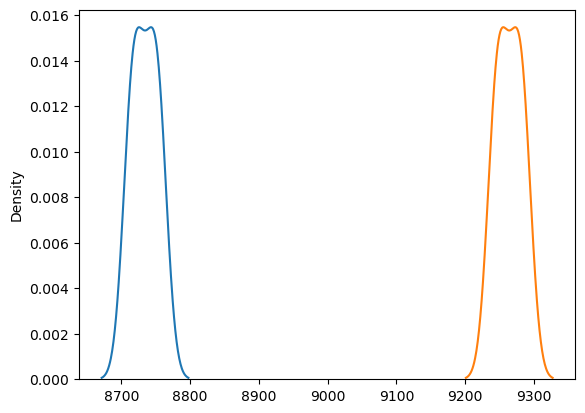

In [47]:
sns.kdeplot(x=female_mean_value)
sns.kdeplot(x=male_mean_value)

From the above confidence interval for the both female and male Does not over lap.
Both the Female and male purchases are independent

In [48]:
Walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [49]:
Walmart_married=Walmart[Walmart["Marital_Status"]==1]
Walmart_married

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254
...,...,...,...,...,...,...,...,...,...,...
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137


In [50]:
Walmart_married.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225337 entries, 6 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     225337 non-null  int64 
 1   Product_ID                  225337 non-null  object
 2   Gender                      225337 non-null  object
 3   Age                         225337 non-null  object
 4   Occupation                  225337 non-null  int64 
 5   City_Category               225337 non-null  object
 6   Stay_In_Current_City_Years  225337 non-null  object
 7   Marital_Status              225337 non-null  int64 
 8   Product_Category            225337 non-null  int64 
 9   Purchase                    225337 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 18.9+ MB


In [51]:
Walmart_married.shape

(225337, 10)

In [52]:
Walmart_married.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,2.253370e+05,225337,225337,225337,225337.000000,225337,225337,225337.0,225337.000000,225337.000000
unique,NaN,3514,2,6,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,793,168349,86291,NaN,94452,83125,NaN,NaN,NaN
mean,1.003071e+06,NaN,NaN,NaN,8.266823,NaN,NaN,1.0,5.498245,9261.174574
std,1.765091e+03,NaN,NaN,NaN,6.687118,NaN,NaN,0.0,3.968868,5016.897378
min,1.000004e+06,NaN,NaN,NaN,0.000000,NaN,NaN,1.0,1.000000,12.000000
25%,1.001506e+06,NaN,NaN,NaN,2.000000,NaN,NaN,1.0,2.000000,5843.000000
50%,1.003093e+06,NaN,NaN,NaN,7.000000,NaN,NaN,1.0,5.000000,8051.000000
75%,1.004647e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.0,8.000000,12042.000000


In [53]:
Walmart_unmarried=Walmart[Walmart["Marital_Status"]==0]
Walmart_unmarried

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,254
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371


In [54]:
Walmart_unmarried.shape

(324731, 10)

In [55]:
Walmart_unmarried.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,3.247310e+05,324731,324731,324731,324731.000000,324731,324731,324731.0,324731.000000,324731.000000
unique,NaN,3524,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1087,245910,133296,NaN,136721,110696,NaN,NaN,NaN
mean,1.002999e+06,NaN,NaN,NaN,7.944782,NaN,NaN,0.0,5.339059,9265.907619
std,1.700466e+03,NaN,NaN,NaN,6.402753,NaN,NaN,0.0,3.912070,5027.347859
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,1.000000,12.000000
25%,1.001524e+06,NaN,NaN,NaN,3.000000,NaN,NaN,0.0,1.000000,5605.000000
50%,1.003065e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.0,5.000000,8044.000000
75%,1.004386e+06,NaN,NaN,NaN,14.000000,NaN,NaN,0.0,8.000000,12061.000000


In [56]:
Walmart_unmarried.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324731 entries, 0 to 550066
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     324731 non-null  int64 
 1   Product_ID                  324731 non-null  object
 2   Gender                      324731 non-null  object
 3   Age                         324731 non-null  object
 4   Occupation                  324731 non-null  int64 
 5   City_Category               324731 non-null  object
 6   Stay_In_Current_City_Years  324731 non-null  object
 7   Marital_Status              324731 non-null  int64 
 8   Product_Category            324731 non-null  int64 
 9   Purchase                    324731 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 27.3+ MB


In [57]:
Walmart_unmarried["Purchase"].mean()

9265.907618921507

In [58]:
Walmart_married["Purchase"].mean()

9261.174574082374

sample of female and male customers you will calculate the interval within which the average spending of 50 million male and
female customers may lie.

In [59]:
samp = np.array(Walmart["Purchase"].sample(len(Walmart)))
x_bar =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)


In [60]:
x_bar-SE,x_bar+SE

(9257.196031625717, 9270.741394292534)

Calculating 90%, 95%, or 99% for married and un married 

In [61]:
samp = np.array(Walmart_married["Purchase"].sample(len(Walmart_married)))
x_bar1 =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)



In [62]:
print("68% confidence interval is  " ,[(x_bar1 - SE),(x_bar1 + SE)])

print("95% confidence interval is  " ,[(x_bar1 -(2* SE)),(x_bar1 + (2* SE))])

print("99% confidence interval is  " ,[(x_bar1 - (3* SE)),(x_bar1 + (3* SE))])

68% confidence interval is   [9250.605937521352, 9271.743210643395]
95% confidence interval is   [9240.03730096033, 9282.311847204417]
99% confidence interval is   [9229.46866439931, 9292.880483765437]


In [63]:
samp = np.array(Walmart_unmarried["Purchase"].sample(len(Walmart_unmarried)))
x_bar2 =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)
print("68% confidence interval is  " ,[(x_bar2 - SE),(x_bar2 + SE)])

print("95% confidence interval is  " ,[(x_bar2 -(2* SE)),(x_bar2 + (2* SE))])

print("99% confidence interval is  " ,[(x_bar2 - (3* SE)),(x_bar2 + (3* SE))])


68% confidence interval is   [9257.085415620213, 9274.7298222228]
95% confidence interval is   [9248.26321231892, 9283.552025524094]
99% confidence interval is   [9239.441009017626, 9292.374228825387]


In [64]:
unmarried_mean_value=(x_bar2 - SE),(x_bar2 + SE),(x_bar2 -(2* SE)),(x_bar2 + (2* SE)),(x_bar2 - (3* SE)),(x_bar2 + (3* SE))
married_mean_value=(x_bar1 - SE),(x_bar1 + SE),(x_bar1 -(2* SE)),(x_bar1 + (2* SE)),(x_bar1 - (3* SE)),(x_bar1 + (3* SE))

Checking whether the confidence inteval overlapps or not

<AxesSubplot:ylabel='Density'>

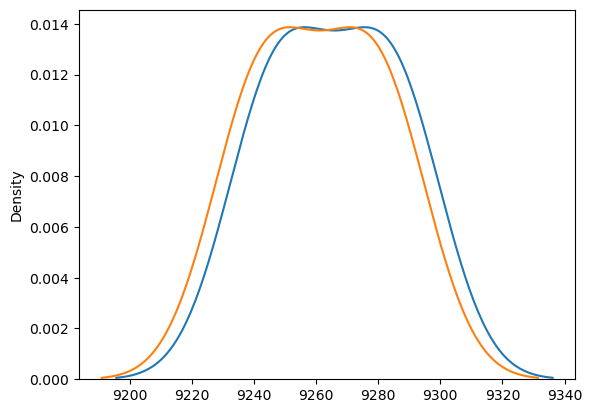

In [65]:
sns.kdeplot(x=unmarried_mean_value)
sns.kdeplot(x=married_mean_value)

In [66]:
Walmart_017=Walmart[Walmart["Age"]=="0-17"]
Walmart_017

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
85,1000019,P00112542,M,0-17,10,A,3,0,1,7746
...,...,...,...,...,...,...,...,...,...,...
549904,1005803,P00375436,M,0-17,10,C,1,0,20,256
550012,1005953,P00370853,M,0-17,10,B,0,0,19,26
550024,1005973,P00370293,M,0-17,10,C,4+,0,19,12
550035,1005989,P00370853,F,0-17,10,C,3,0,19,61


In [67]:
Walmart_1825=Walmart[Walmart["Age"]=="18-25"]
Walmart_1825

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
70,1000018,P00366542,F,18-25,3,B,3,0,5,1780
71,1000018,P00190742,F,18-25,3,B,3,0,3,10754
72,1000018,P00151842,F,18-25,3,B,3,0,4,2802
73,1000018,P00112642,F,18-25,3,B,3,0,1,19473
74,1000018,P00118442,F,18-25,3,B,3,0,1,19672
...,...,...,...,...,...,...,...,...,...,...
550000,1005936,P00370293,M,18-25,4,C,4+,0,19,14
550015,1005957,P00372445,M,18-25,20,B,1,1,20,477
550017,1005959,P00371644,F,18-25,4,B,2,1,20,363
550020,1005964,P00370293,M,18-25,5,B,1,0,19,36


In [68]:
Walmart_2635=Walmart[Walmart["Age"]=="26-35"]
Walmart_2635

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,6073
...,...,...,...,...,...,...,...,...,...,...
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371


In [69]:
Walmart_3645=Walmart[Walmart["Age"]=="36-45"]
Walmart_3645

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
18,1000007,P00036842,M,36-45,1,B,1,1,1,11788
29,1000010,P00085942,F,36-45,1,B,4+,1,2,16352
30,1000010,P00118742,F,36-45,1,B,4+,1,5,8886
31,1000010,P00297942,F,36-45,1,B,4+,1,8,5875
32,1000010,P00266842,F,36-45,1,B,4+,1,5,8854
...,...,...,...,...,...,...,...,...,...,...
550049,1006011,P00375436,M,36-45,15,C,3,0,20,473
550050,1006012,P00371644,M,36-45,15,C,4+,1,20,368
550053,1006017,P00371644,F,36-45,7,B,1,0,20,371
550054,1006018,P00370293,M,36-45,1,C,3,0,19,60


In [70]:
Walmart_4650=Walmart[Walmart["Age"]=="46-50"]
Walmart_4650

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
52,1000013,P00129542,M,46-50,1,C,3,1,8,5839
53,1000013,P00140742,M,46-50,1,C,3,1,1,15912
...,...,...,...,...,...,...,...,...,...,...
550041,1006000,P00371644,M,46-50,17,B,2,1,20,488
550043,1006003,P00370293,F,46-50,17,C,1,0,19,48
550052,1006016,P00375436,M,46-50,1,B,1,1,20,239
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [71]:
Walmart_5155=Walmart[Walmart["Age"]=="51-55"]
Walmart_5155

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
15,1000006,P00190242,F,51-55,9,A,1,0,4,2079
16,1000006,P0096642,F,51-55,9,A,1,0,2,13055
17,1000006,P00058442,F,51-55,9,A,1,0,5,8851
67,1000017,P00019342,M,51-55,1,C,0,0,1,15872
...,...,...,...,...,...,...,...,...,...,...
549985,1005916,P00370853,M,51-55,20,B,1,1,19,24
550004,1005940,P00370853,M,51-55,12,C,1,1,19,12
550037,1005993,P00370293,F,51-55,20,C,1,1,19,62
550042,1006002,P00371644,M,51-55,0,C,1,1,20,243


In [72]:
Walmart_55=Walmart[Walmart["Age"]=="55+"]
Walmart_55


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
159,1000031,P00117442,M,55+,7,C,2,0,5,8596
160,1000031,P00322042,M,55+,7,C,2,0,5,5248
161,1000031,P00216342,M,55+,7,C,2,0,3,10592
162,1000031,P00329342,M,55+,7,C,2,0,5,3482
...,...,...,...,...,...,...,...,...,...,...
549925,1005834,P00371644,M,55+,16,C,4+,0,20,121
549989,1005922,P00370853,M,55+,3,C,3,0,19,12
550008,1005946,P00370853,F,55+,1,A,0,0,19,50
550030,1005980,P00372445,M,55+,1,C,3,0,20,376


<AxesSubplot:xlabel='Age', ylabel='Count'>

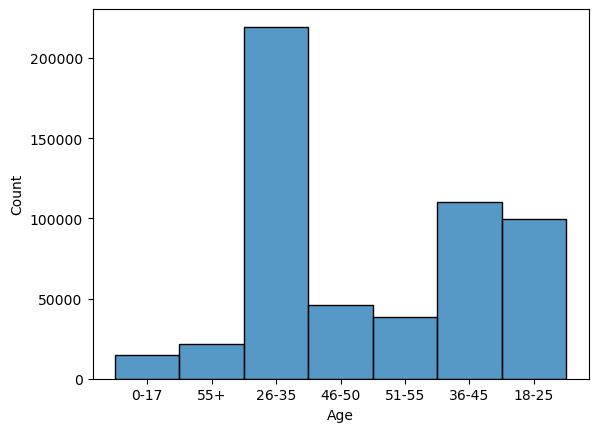

In [73]:
sns.histplot(x=Walmart["Age"])

In [74]:
Walmart_017["Purchase"].mean()

8933.464640444974

In [75]:
Walmart_1825["Purchase"].mean()

9169.663606261289

In [76]:
Walmart_2635["Purchase"].mean()

9252.690632869888

In [77]:
Walmart_3645["Purchase"].mean()

9331.350694917874

In [78]:
Walmart_4650["Purchase"].mean()

9208.625697468327

In [79]:
Walmart_5155["Purchase"].mean()

9534.808030960236

In [80]:
Walmart_55["Purchase"].mean()

9336.280459449405

In [81]:
samp = np.array(Walmart["Purchase"].sample(len(Walmart)))
x_bar =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)
x_bar-SE,x_bar+SE

(9257.196031625715, 9270.741394292536)

In [82]:
x_bar-(2*SE),x_bar+(2*SE)

(9250.423350292307, 9277.514075625944)

In [83]:
x_bar-(3*SE),x_bar+(3*SE)

(9243.650668958897, 9284.286756959355)

Confidence Interval for Walmart_017["Purchase"]

In [85]:
samp = np.array(Walmart_017["Purchase"].sample(len(Walmart_017)))
x_bar =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)
print("68% confidence interval is  " ,[(x_bar - SE),(x_bar + SE)])

print("95% confidence interval is  " ,[(x_bar -(2* SE)),(x_bar + (2* SE))])

print("99% confidence interval is  " ,[(x_bar - (3* SE)),(x_bar + (3* SE))])

68% confidence interval is   [8891.873738497141, 8975.055542392807]
95% confidence interval is   [8850.282836549308, 9016.64644434064]
99% confidence interval is   [8808.691934601475, 9058.237346288473]


Confidence Interval for Walmart_1825["Purchase"]

In [87]:
samp = np.array(Walmart_1825["Purchase"].sample(len(Walmart_1825)))
x_bar1 =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)
print("68% confidence interval is  " ,[(x_bar1 - SE),(x_bar1 + SE)])

print("95% confidence interval is  " ,[(x_bar1 -(2* SE)),(x_bar1 + (2* SE))])

print("99% confidence interval is  " ,[(x_bar1 - (3* SE)),(x_bar1 + (3* SE))])

68% confidence interval is   [9153.716549195757, 9185.610663326821]
95% confidence interval is   [9137.769492130225, 9201.557720392353]
99% confidence interval is   [9121.822435064692, 9217.504777457885]


Confidence Interval for Walmart_2635["Purchase"]

In [88]:
samp = np.array(Walmart_2635["Purchase"].sample(len(Walmart_2635)))
x_bar2 =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)
print("68% confidence interval is  " ,[(x_bar2 - SE),(x_bar2 + SE)])

print("95% confidence interval is  " ,[(x_bar2 -(2* SE)),(x_bar2 + (2* SE))])

print("99% confidence interval is  " ,[(x_bar2 - (3* SE)),(x_bar2 + (3* SE))])

68% confidence interval is   [9241.998111662782, 9263.383154076993]
95% confidence interval is   [9231.305590455675, 9274.0756752841]
99% confidence interval is   [9220.61306924857, 9284.768196491206]


Confidence Interval for Walmart_3645["Purchase"]

In [89]:
samp = np.array(Walmart_3645["Purchase"].sample(len(Walmart_3645)))
x_bar3 =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)
print("68% confidence interval is  " ,[(x_bar3 - SE),(x_bar3 + SE)])

print("95% confidence interval is  " ,[(x_bar3 -(2* SE)),(x_bar3 + (2* SE))])

print("99% confidence interval is  " ,[(x_bar3 - (3* SE)),(x_bar3 + (3* SE))])

68% confidence interval is   [9316.206904426475, 9346.494485409272]
95% confidence interval is   [9301.063113935077, 9361.63827590067]
99% confidence interval is   [9285.91932344368, 9376.782066392067]


Confidence Interval for Walmart_4650["Purchase"]

In [90]:
samp = np.array(Walmart_4650["Purchase"].sample(len(Walmart_4650)))
x_bar4 =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)
print("68% confidence interval is  " ,[(x_bar4 - SE),(x_bar4 + SE)])

print("95% confidence interval is  " ,[(x_bar4 -(2* SE)),(x_bar4 + (2* SE))])

print("99% confidence interval is  " ,[(x_bar4 - (3* SE)),(x_bar4 + (3* SE))])

68% confidence interval is   [9185.390293563565, 9231.86110137309]
95% confidence interval is   [9162.154889658801, 9255.096505277854]
99% confidence interval is   [9138.919485754039, 9278.331909182616]


Confidence Interval for Walmart_5155["Purchase"]

In [91]:
samp = np.array(Walmart_5155["Purchase"].sample(len(Walmart_5155)))
x_bar5 =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)
print("68% confidence interval is  " ,[(x_bar5 - SE),(x_bar5 + SE)])

print("95% confidence interval is  " ,[(x_bar5 -(2* SE)),(x_bar5 + (2* SE))])

print("99% confidence interval is  " ,[(x_bar5 - (3* SE)),(x_bar5 + (3* SE))])

68% confidence interval is   [9508.880739140339, 9560.735322780132]
95% confidence interval is   [9482.95344732044, 9586.66261460003]
99% confidence interval is   [9457.026155500544, 9612.589906419928]


Confidence Interval for Walmart_55["Purchase"]

In [92]:
samp = np.array(Walmart_55["Purchase"].sample(len(Walmart_55)))
x_bar6 =samp.mean()
n = len(samp)
s = pd.Series(samp).std()
SE=s/np.sqrt(n)
print("68% confidence interval is  " ,[(x_bar6 - SE),(x_bar6 + SE)])

print("95% confidence interval is  " ,[(x_bar6 -(2* SE)),(x_bar6 + (2* SE))])

print("99% confidence interval is  " ,[(x_bar6 - (3* SE)),(x_bar6 + (3* SE))])

68% confidence interval is   [9302.105532991563, 9370.455385907246]
95% confidence interval is   [9267.930606533722, 9404.630312365087]
99% confidence interval is   [9233.755680075881, 9438.805238822928]


In [94]:
Age_017=(x_bar - SE),(x_bar + SE),(x_bar -(2* SE)),(x_bar + (2* SE)),(x_bar - (3* SE)),(x_bar + (3* SE))
Age_1825=(x_bar1 - SE),(x_bar1 + SE),(x_bar1 -(2* SE)),(x_bar1 + (2* SE)),(x_bar1 - (3* SE)),(x_bar1 + (3* SE))
Age_2635=(x_bar2 - SE),(x_bar2 + SE),(x_bar2 -(2* SE)),(x_bar2 + (2* SE)),(x_bar2 - (3* SE)),(x_bar2 + (3* SE))
Age_3645=(x_bar3 - SE),(x_bar3 + SE),(x_bar3 -(2* SE)),(x_bar3 + (2* SE)),(x_bar3 - (3* SE)),(x_bar3 + (3* SE))
Age_4650=(x_bar4 - SE),(x_bar4 + SE),(x_bar4 -(2* SE)),(x_bar4 + (2* SE)),(x_bar4 - (3* SE)),(x_bar4 + (3* SE))
Age_5055=(x_bar5 - SE),(x_bar5 + SE),(x_bar5 -(2* SE)),(x_bar5 + (2* SE)),(x_bar5 - (3* SE)),(x_bar5 + (3* SE))
Age_55=(x_bar6 - SE),(x_bar6 + SE),(x_bar6 -(2* SE)),(x_bar6 + (2* SE)),(x_bar6 - (3* SE)),(x_bar6 + (3* SE))

Checking whether the confidence inteval overlapps or not

<AxesSubplot:ylabel='Density'>

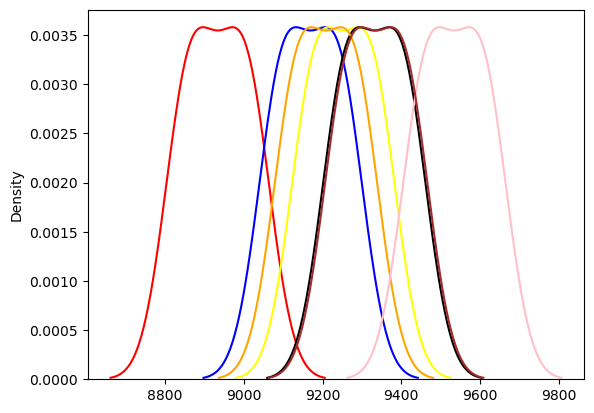

In [111]:
sns.kdeplot(x=Age_017,color="Red")
sns.kdeplot(x=Age_1825,color="Blue")
sns.kdeplot(x=Age_2635,color="yellow")
sns.kdeplot(x=Age_3645,color="Black")
sns.kdeplot(x=Age_4650,color="Orange")
sns.kdeplot(x=Age_5055,color="Pink")
sns.kdeplot(x=Age_55,color="Brown")

In [112]:
Walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [113]:
Walmart["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [117]:
Walmart[Walmart["City_Category"]=="A"]["Purchase"].mean()

8911.939216084484

In [118]:
Walmart[Walmart["City_Category"]=="B"]["Purchase"].mean()

9151.300562781986

In [119]:
Walmart[Walmart["City_Category"]=="C"]["Purchase"].mean()

9719.92099313568

In [120]:
Walmart["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [123]:
Walmart["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [125]:
Walmart["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [129]:
Walmart.groupby("Stay_In_Current_City_Years")["Purchase"].mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64